In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data=pd.read_csv("HR_comma_sep.csv")
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [118]:
#labeling by ordinal encoder
ordinal_encoder=OrdinalEncoder()
data[["Department","salary"]]=ordinal_encoder.fit_transform(data[["Department","salary"]])
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7.0,1.0
1,0.80,0.86,5,262,6,0,1,0,7.0,2.0
2,0.11,0.88,7,272,4,0,1,0,7.0,2.0


In [119]:
data.shape

(14999, 10)

In [120]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


<Axes: xlabel='salary'>

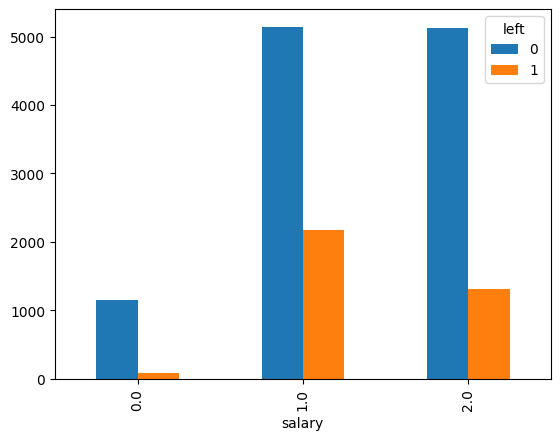

In [121]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

In [122]:
data.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
Department,,,,,,,,,
0.0,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,1.368378
1.0,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,1.407878
2.0,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,1.340287
3.0,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,1.424899
4.0,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,1.000000
5.0,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,1.344988
6.0,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,1.349224
7.0,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,1.363043
8.0,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,1.359354


<Axes: xlabel='Department'>

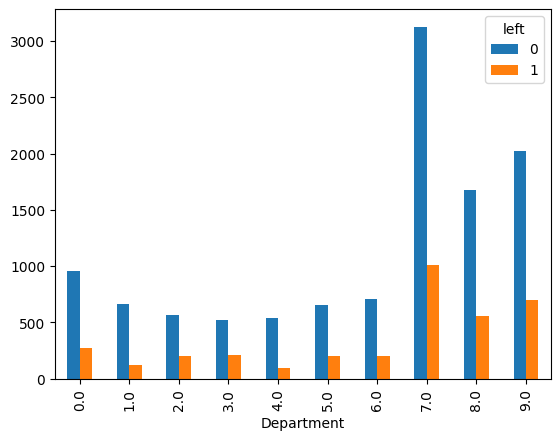

In [123]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

In [124]:
#Training model
x=data.drop(columns='left',axis=1)
y=data.left
model=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.3)
model.fit(X_train,y_train)

f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
#Accuracy
model.predict(X_test)
model.score(X_test,y_test)

0.7637142857142857

In [126]:
y_predicted=model.predict(X_test)
y_predicted[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [127]:
y_test[:5]

11017    0
10539    0
7298     0
13804    0
14563    1
Name: left, dtype: int64